# General EDA 

In [48]:
import pandas as pd

# to see all data colums
pd.set_option('display.max_columns', None)
import seaborn as sns
# print(sns.__version__)

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, skewtest, pearsonr, spearmanr, normaltest, levene
import time

In [2]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
print(sns.__version__)

0.13.2


In [4]:
churn = pd.read_csv('churn.csv')

In [5]:
# to check data info
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
# to check top 5 data
churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
churn.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
churn.describe(include = 'object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,8608,9378,10127,10127
unique,2,2,6,3,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## Analisis Univariat

### Univariat Numerik

In [9]:
# filter fitur numerik
churn_num = churn.select_dtypes('number')
churn_num.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
# drop data 'CLIENTNUM' karna tdk akan di explorasi
churn_num = churn_num.drop('CLIENTNUM', axis=1)
churn_num.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [11]:
churn_num['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

In [12]:
skew(churn_num['Customer_Age'])

-0.03360003857464426

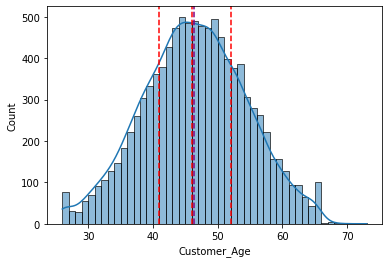

In [13]:
sns.histplot(data=churn_num, x='Customer_Age', kde=True)
plt.axvline(np.percentile(churn_num['Customer_Age'], 25), color='red', linestyle='--')
plt.axvline(np.percentile(churn_num['Customer_Age'], 50), color='red', linestyle='--')
plt.axvline(np.percentile(churn_num['Customer_Age'], 75), color='red', linestyle='--')
plt.axvline(np.mean(churn_num['Customer_Age']), color='purple', linestyle='--')

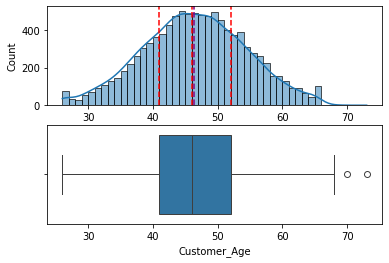

In [14]:
# Buat plot menjadi lebih rapi
fig, axs = plt.subplots(2, 1)
sns.histplot(data=churn_num, x='Customer_Age', kde=True, ax = axs[0])
axs[0].axvline(np.percentile(churn_num['Customer_Age'], 25), color='red', linestyle='--')
axs[0].axvline(np.percentile(churn_num['Customer_Age'], 50), color='red', linestyle='--')
axs[0].axvline(np.percentile(churn_num['Customer_Age'], 75), color='red', linestyle='--')
axs[0].axvline(np.mean(churn_num['Customer_Age']), color='purple', linestyle='--')

sns.boxplot(data = churn_num, x='Customer_Age', ax = axs[1])

plt.show()

In [15]:
skewtest(churn_num['Customer_Age'])

SkewtestResult(statistic=-1.3810305110080783, pvalue=0.16726957958130273)

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

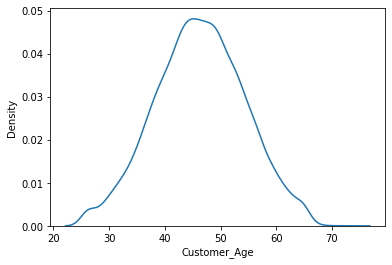

In [16]:
# density plot
sns.kdeplot(data=churn_num, x='Customer_Age')

<AxesSubplot:xlabel='Customer_Age'>

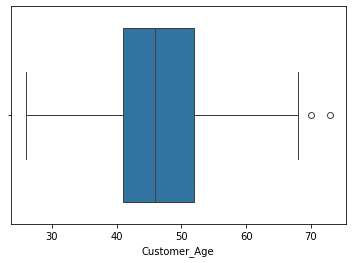

In [17]:
sns.boxplot(data = churn_num, x='Customer_Age')

<AxesSubplot:xlabel='Customer_Age'>

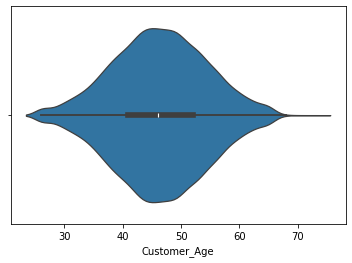

In [18]:
sns.violinplot(data = churn_num, x='Customer_Age')

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

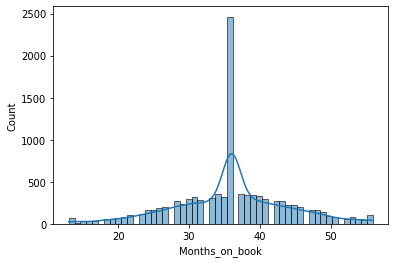

In [19]:
sns.histplot(data = churn_num, x='Months_on_book', kde=True)

In [20]:
skew(churn_num['Months_on_book'])

-0.1065495749017217

In [21]:
skewtest(churn_num['Months_on_book'])

SkewtestResult(statistic=-4.368327150252843, pvalue=1.252018503085325e-05)

1. Lower Whisker
2. Upper Whisker
3. Outlier Count
4. Outlier List

In [22]:
def whisk(x):
    q1 = np.nanpercentile(x, 25)
    q3 = np.nanpercentile(x, 75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    
    # Identifikasi non outlier menggunakan lower dan upper fence
    non_outlier = []
    for num in x:
        if num >= lower_fence:
            if num <= upper_fence:
                non_outlier.append(num)
                
    lower_whisker = np.min(non_outlier)
    upper_whisker = np.max(non_outlier)
    
    # Identifikasi outlier menggunakan lower dan upper fence
    outlier = []
    for num in x:
        if num < lower_fence:
            outlier.append(num)
        if num > upper_fence:
            outlier.append(num)
            
    outlier_count = len(outlier)
    
    print('lower_whisker : {}'.format(lower_whisker))
    print('upper_whisker : {}'.format(upper_whisker))
    print('outlier : {}'.format(outlier))
    print('outlier counts : {}'.format(outlier_count))
    

In [23]:
whisk(churn_num['Customer_Age'])

lower_whisker : 26
upper_whisker : 68
outlier : [73, 70]
outlier counts : 2


In [24]:
for y in churn_num.columns:
    print(' "{}", '.format(y))

 "Customer_Age", 
 "Dependent_count", 
 "Months_on_book", 
 "Total_Relationship_Count", 
 "Months_Inactive_12_mon", 
 "Contacts_Count_12_mon", 
 "Credit_Limit", 
 "Total_Revolving_Bal", 
 "Avg_Open_To_Buy", 
 "Total_Amt_Chng_Q4_Q1", 
 "Total_Trans_Amt", 
 "Total_Trans_Ct", 
 "Total_Ct_Chng_Q4_Q1", 
 "Avg_Utilization_Ratio", 


In [25]:
# HISTOGRAM
def plot_histogram(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=df, x=col, kde=True)
        
        # Garis percentiles & mean
        plt.axvline(np.percentile(df[col], 25), color='red', linestyle='--', label='25th Percentile')
        plt.axvline(np.percentile(df[col], 50), color='red', linestyle='--', label='Median (50th)')
        plt.axvline(np.percentile(df[col], 75), color='red', linestyle='--', label='75th Percentile')
        plt.axvline(np.mean(df[col]), color='purple', linestyle='--', label='Mean')
        
        plt.title(f"Distribution of {col}")
        plt.legend()
        plt.show()

In [26]:
plot_columns = [ "Customer_Age", 
 "Dependent_count", 
 "Months_on_book", 
 "Total_Relationship_Count", 
 "Months_Inactive_12_mon", 
 "Contacts_Count_12_mon", 
 "Credit_Limit", 
 "Total_Revolving_Bal", 
 "Avg_Open_To_Buy", 
 "Total_Amt_Chng_Q4_Q1", 
 "Total_Trans_Amt", 
 "Total_Trans_Ct", 
 "Total_Ct_Chng_Q4_Q1", 
 "Avg_Utilization_Ratio"]

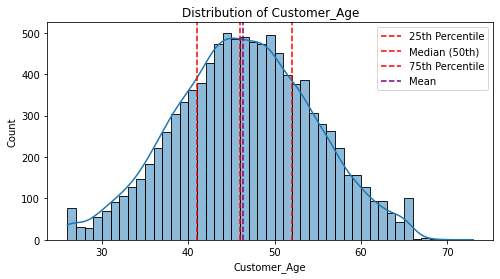

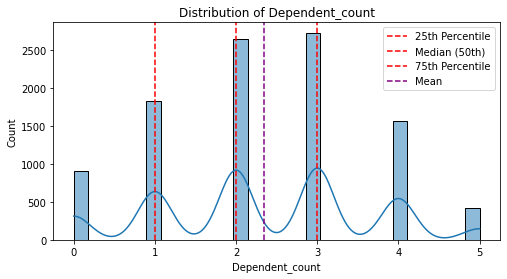

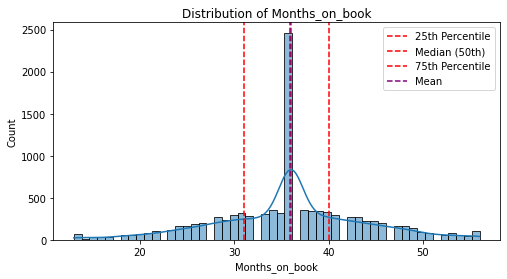

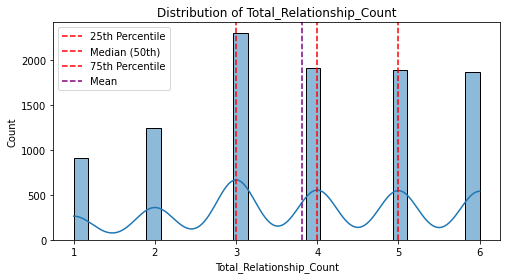

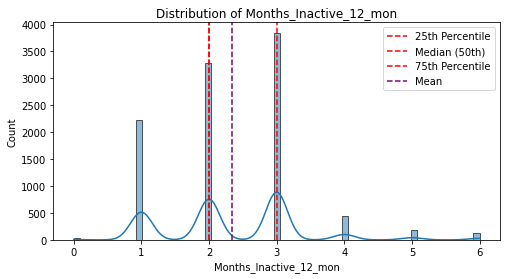

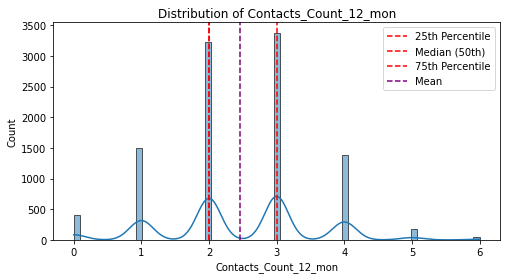

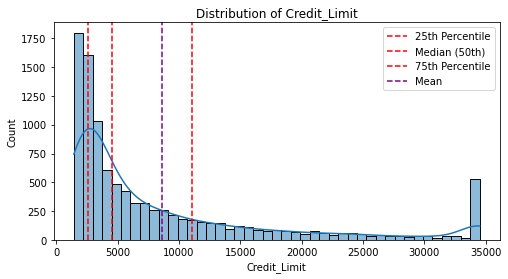

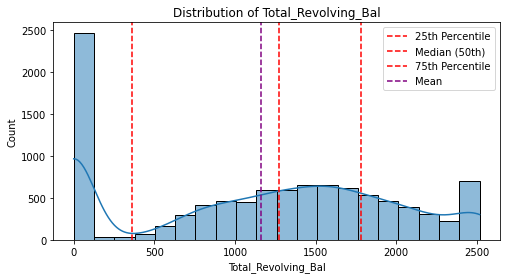

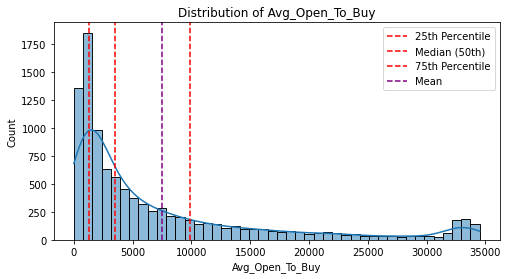

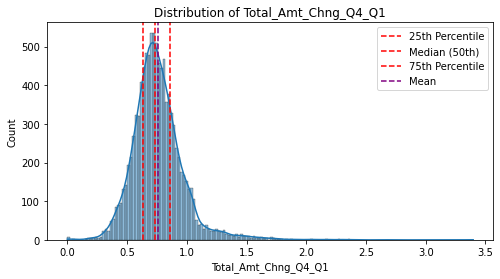

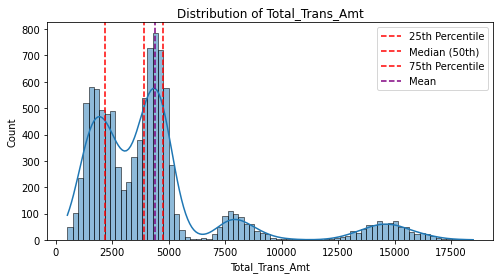

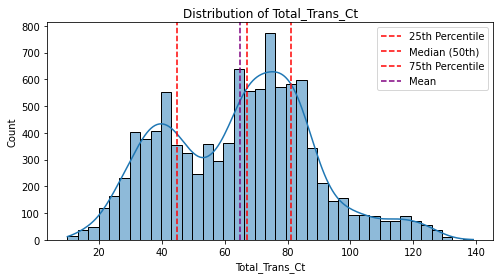

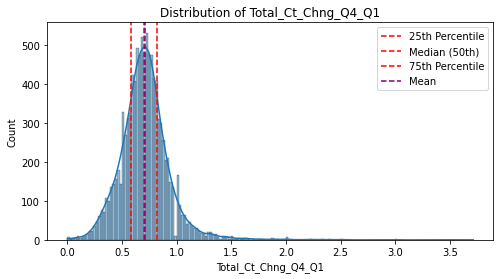

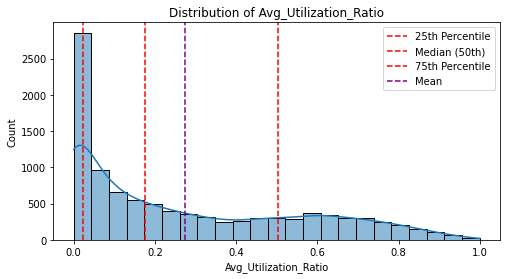

In [27]:
plot_histogram(churn_num, plot_columns)

In [28]:
# BOXPLOT
def plot_boxplot(df, columns):
    for col in columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=col, color='skyblue')
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.show()

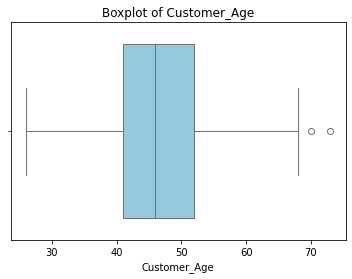

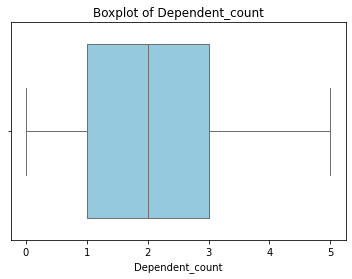

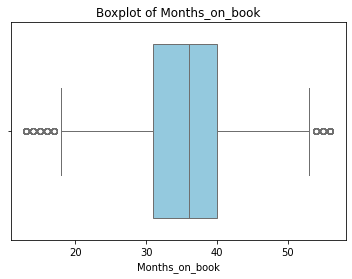

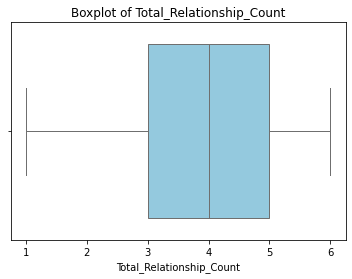

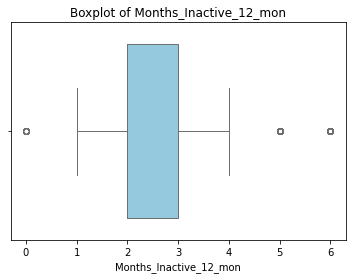

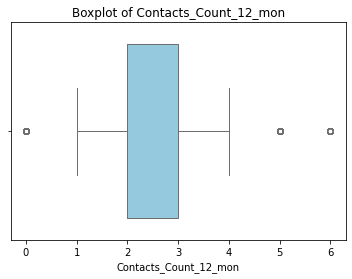

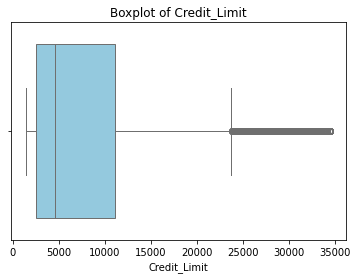

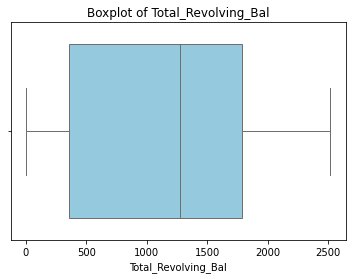

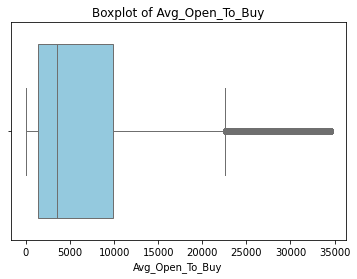

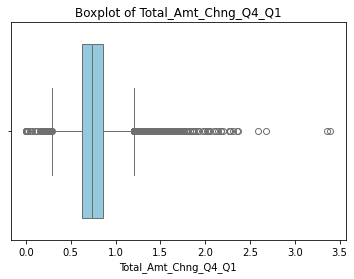

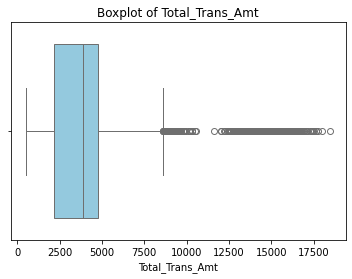

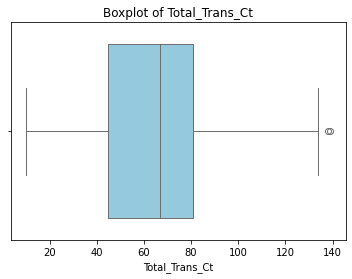

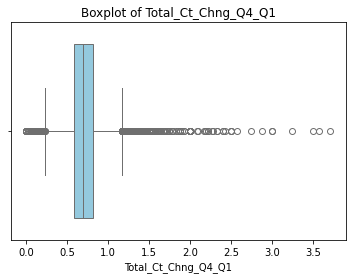

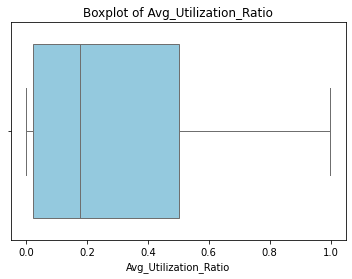

In [29]:
plot_boxplot(churn_num, plot_columns)

1
Customer_Age


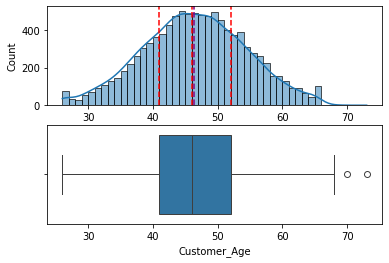

Data Tidak Skewed
count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64
lower_whisker : 26
upper_whisker : 68
outlier : [73, 70]
outlier counts : 2
**************************************************
2
Dependent_count


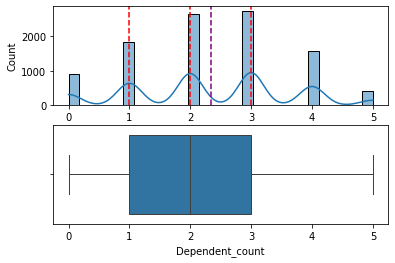

Data Tidak Skewed
count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dtype: float64
lower_whisker : 0
upper_whisker : 5
outlier : []
outlier counts : 0
**************************************************
3
Months_on_book


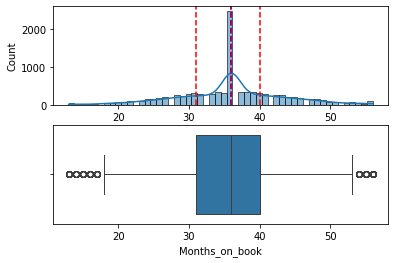

Data Skewed dengan Skew: -0.1065495749017217
count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64
lower_whisker : 18
upper_whisker : 53
outlier : [54, 56, 56, 56, 54, 56, 56, 56, 54, 55, 56, 56, 54, 54, 56, 56, 56, 56, 13, 13, 56, 56, 13, 56, 56, 56, 15, 56, 17, 13, 54, 54, 13, 56, 54, 13, 54, 55, 54, 17, 17, 56, 13, 17, 16, 15, 16, 56, 56, 13, 56, 56, 56, 17, 14, 13, 13, 56, 54, 54, 15, 56, 16, 56, 17, 17, 14, 17, 55, 55, 14, 13, 14, 54, 54, 13, 15, 13, 13, 15, 13, 13, 13, 17, 55, 56, 56, 13, 15, 55, 13, 13, 55, 13, 15, 16, 56, 13, 56, 16, 54, 16, 55, 55, 16, 56, 56, 17, 54, 13, 13, 17, 14, 56, 15, 13, 13, 54, 13, 17, 13, 14, 13, 13, 56, 15, 15, 16, 13, 55, 56, 17, 17, 15, 17, 15, 13, 56, 56, 13, 54, 56, 55, 15, 56, 15, 56, 16, 17, 13, 15, 13, 56, 56, 56, 13, 56, 56, 17, 13, 56, 16, 55, 14, 14, 16, 54, 17, 17, 13, 17, 14, 14, 1

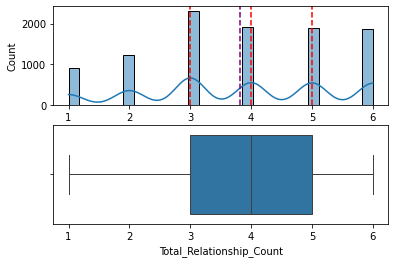

Data Skewed dengan Skew: -0.16242835172024658
count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Total_Relationship_Count, dtype: float64
lower_whisker : 1
upper_whisker : 6
outlier : []
outlier counts : 0
**************************************************
5
Months_Inactive_12_mon


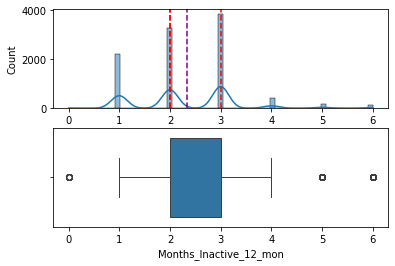

Data Skewed dengan Skew: 0.6329673568012449
count    10127.000000
mean         2.341167
std          1.010622
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Months_Inactive_12_mon, dtype: float64
lower_whisker : 1
upper_whisker : 4
outlier : [6, 0, 5, 0, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 0, 5, 5, 6, 6, 6, 5, 6, 0, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 0, 5, 6, 0, 5, 6, 6, 6, 6, 5, 6, 0, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 0, 6, 6, 6, 0, 6, 0, 5, 5, 0, 6, 6, 6, 5, 5, 6, 0, 0, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 0, 5, 6, 6, 6, 5, 6, 6, 0, 5, 5, 6, 5, 6, 5, 6, 5, 0, 5, 5, 0, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 0, 6, 6, 6, 0, 6, 6, 5, 5, 6, 0, 0, 6, 0, 5, 5, 6, 6, 0, 0, 5, 0, 5, 6, 0, 0, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

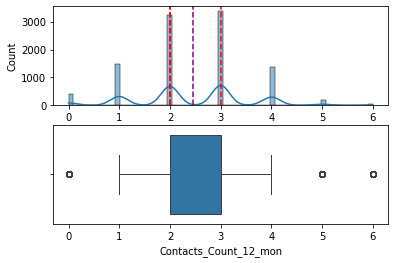

Data Tidak Skewed
count    10127.000000
mean         2.455317
std          1.106225
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Contacts_Count_12_mon, dtype: float64
lower_whisker : 1
upper_whisker : 4
outlier : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 0, 5

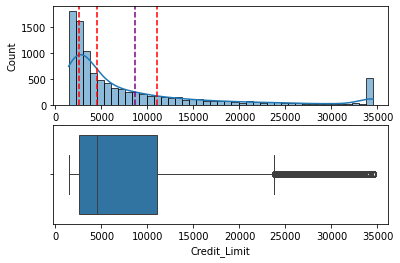

Data Skewed dengan Skew: 1.6664789242587705
count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64
lower_whisker : 1438.3
upper_whisker : 23760.0
outlier : [34516.0, 29081.0, 30367.0, 32426.0, 34516.0, 34516.0, 23957.0, 34516.0, 25300.0, 34516.0, 24312.0, 28904.0, 34516.0, 34516.0, 31302.0, 34516.0, 34516.0, 33791.0, 24159.0, 34516.0, 34516.0, 32090.0, 32643.0, 32975.0, 34516.0, 26792.0, 27259.0, 34516.0, 34516.0, 24407.0, 34516.0, 34516.0, 27756.0, 34516.0, 34516.0, 34516.0, 24396.0, 34516.0, 27126.0, 34516.0, 24221.0, 34516.0, 34516.0, 34516.0, 34516.0, 34516.0, 34516.0, 24571.0, 28202.0, 24850.0, 34516.0, 29963.0, 27000.0, 34516.0, 24487.0, 29801.0, 34516.0, 29659.0, 26181.0, 29770.0, 29205.0, 24602.0, 34516.0, 30579.0, 24480.0, 33304.0, 27512.0, 34516.0, 34516.0, 26443.0, 23981.0, 34516.0, 24869.0, 34516.0, 30271.0, 34516.0, 247

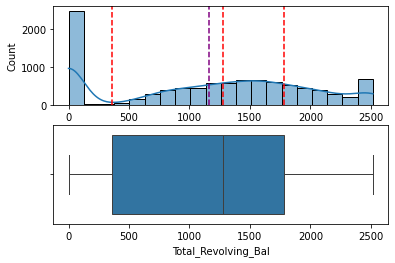

Data Skewed dengan Skew: -0.14881520376464566
count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64
lower_whisker : 0
upper_whisker : 2517
outlier : []
outlier counts : 0
**************************************************
9
Avg_Open_To_Buy


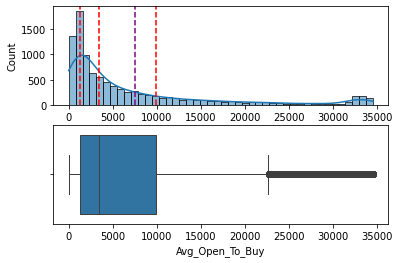

Data Skewed dengan Skew: 1.6614504071556497
count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64
lower_whisker : 3.0
upper_whisker : 22616.0
outlier : [32252.0, 27685.0, 28005.0, 31848.0, 34516.0, 34516.0, 33001.0, 23970.0, 32753.0, 27005.0, 32983.0, 33297.0, 29349.0, 32463.0, 33585.0, 31831.0, 22963.0, 33493.0, 32989.0, 32090.0, 32643.0, 30458.0, 33256.0, 24956.0, 27259.0, 32837.0, 33048.0, 33157.0, 33314.0, 25967.0, 32850.0, 34516.0, 32864.0, 23225.0, 23603.0, 33076.0, 27126.0, 32455.0, 34516.0, 32339.0, 32817.0, 34516.0, 32351.0, 32242.0, 27359.0, 23188.0, 32430.0, 27869.0, 27000.0, 33262.0, 27885.0, 32985.0, 28516.0, 26181.0, 28205.0, 27997.0, 22942.0, 32919.0, 29228.0, 31471.0, 25375.0, 32403.0, 33503.0, 24842.0, 22718.0, 32578.0, 23140.0, 32342.0, 28865.0, 32938.0, 22697.0, 23066.0, 26660.0, 32387.0, 31999.0, 33250.0, 303

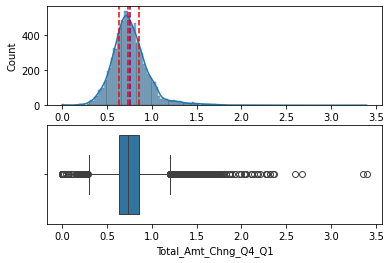

Data Skewed dengan Skew: 1.7318068495622156
count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64
lower_whisker : 0.293
upper_whisker : 1.201
outlier : [1.335, 1.541, 2.594, 1.405, 2.175, 1.376, 1.975, 2.204, 3.355, 1.524, 1.433, 3.397, 1.707, 1.708, 1.831, 1.608, 1.323, 1.726, 1.75, 1.724, 1.32, 1.449, 1.214, 1.621, 2.316, 2.357, 1.321, 1.224, 2.275, 1.715, 1.266, 1.312, 1.242, 1.932, 1.702, 1.705, 1.656, 1.283, 1.674, 1.826, 1.873, 1.584, 1.541, 1.689, 1.236, 1.996, 1.317, 1.255, 2.121, 1.373, 1.3, 1.248, 1.456, 1.432, 2.053, 1.791, 1.334, 1.768, 1.642, 1.242, 1.509, 1.259, 1.327, 2.368, 1.727, 1.207, 1.363, 1.53, 1.302, 1.434, 2.145, 1.859, 1.32, 1.256, 1.32, 1.252, 1.707, 1.315, 1.223, 1.269, 1.227, 1.503, 1.284, 1.521, 1.636, 2.023, 1.205, 1.322, 1.326, 2.271, 1.362, 1.26, 1.519, 1.566, 1.346, 1.265, 1.391, 1.337, 1.38

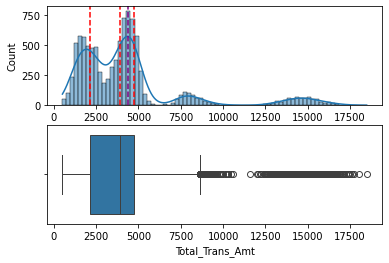

Data Skewed dengan Skew: 2.0407010789778317
count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64
lower_whisker : 510
upper_whisker : 8618
outlier : [8693, 8947, 8854, 8796, 8778, 8644, 9331, 8987, 8780, 8753, 8642, 8904, 9137, 8657, 8814, 12535, 8872, 8689, 8871, 9389, 8652, 8677, 8686, 8669, 8752, 8637, 8851, 9042, 9277, 8963, 8879, 9081, 9185, 8914, 8751, 8695, 8980, 9059, 8920, 8888, 8804, 9179, 8736, 9105, 9406, 8646, 8777, 8998, 8634, 8888, 8785, 8765, 13794, 14771, 8938, 8773, 8838, 8766, 9497, 8852, 9523, 9065, 14373, 8927, 13173, 13363, 9339, 12956, 15139, 14132, 13015, 15511, 14833, 13630, 14213, 14276, 14264, 15423, 13400, 14965, 12871, 8646, 13945, 15200, 11603, 13820, 12603, 12478, 14334, 12403, 14576, 13324, 14465, 14567, 12896, 13360, 13787, 13677, 13119, 15106, 14084, 15078, 13670, 13719, 14603, 15019, 14954, 144

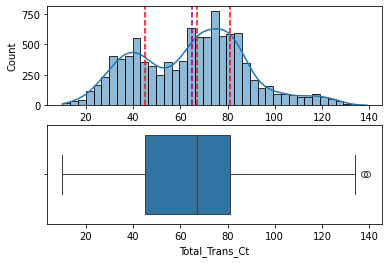

Data Skewed dengan Skew: 0.1536503056777963
count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64
lower_whisker : 10
upper_whisker : 134
outlier : [139, 138]
outlier counts : 2
**************************************************
13
Total_Ct_Chng_Q4_Q1


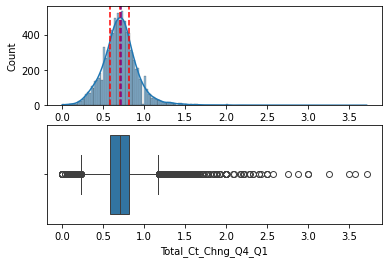

Data Skewed dengan Skew: 2.063724833411372
count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64
lower_whisker : 0.231
upper_whisker : 1.172
outlier : [1.625, 3.714, 2.333, 2.333, 2.5, 1.182, 1.364, 3.25, 2.0, 1.7, 1.625, 1.571, 1.3, 1.571, 2.571, 1.6, 1.667, 1.176, 1.2, 0.143, 1.2, 1.333, 1.7, 1.923, 1.417, 1.25, 2.4, 2.0, 1.182, 1.875, 1.412, 2.0, 1.8, 1.636, 1.333, 2.182, 1.222, 1.5, 1.625, 3.0, 1.571, 1.533, 1.417, 2.2, 1.545, 1.211, 1.231, 1.5, 2.875, 1.308, 1.909, 1.231, 1.364, 2.429, 2.167, 1.333, 2.286, 1.467, 1.444, 1.273, 3.0, 1.444, 1.364, 1.333, 1.273, 1.263, 2.0, 1.455, 2.273, 0.167, 1.615, 1.6, 1.294, 1.3, 1.444, 1.357, 3.5, 1.286, 1.214, 2.4, 1.667, 1.625, 1.538, 2.083, 1.417, 2.0, 1.308, 2.1, 1.2, 1.417, 0.182, 1.75, 1.875, 1.875, 1.444, 0.182, 1.227, 1.833, 1.462, 1.444, 2.75, 1.385, 1.308, 1.188, 1.182, 1.1

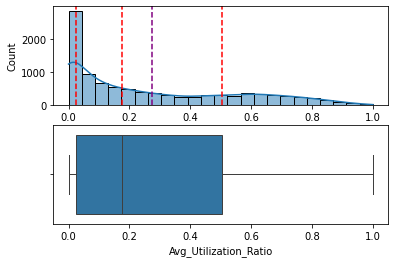

Data Skewed dengan Skew: 0.7179016418496336
count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64
lower_whisker : 0.0
upper_whisker : 0.999
outlier : []
outlier counts : 0
**************************************************


In [30]:
a = 1
for x in churn_num.columns:
    print(a)
    print(x)
    
    # Histogram Plot
    fig, axs = plt.subplots(2, 1)
    sns.histplot(data=churn_num, x=x, kde=True, ax = axs[0])
    axs[0].axvline(np.percentile(churn_num[x], 25), color='red', linestyle='--')
    axs[0].axvline(np.percentile(churn_num[x], 50), color='red', linestyle='--')
    axs[0].axvline(np.percentile(churn_num[x], 75), color='red', linestyle='--')
    axs[0].axvline(np.mean(churn_num[x]), color='purple', linestyle='--')
    
    # Box Plot
    sns.boxplot(data = churn_num, x=x, ax = axs[1])

    plt.show()
    
    # Hitung Skew
    sk = skew(churn_num[x])
    stat, p_value = skewtest(churn_num[x])
    if p_value < 0.05:
        print('Data Skewed dengan Skew: {}'.format(sk))
    else:
        print('Data Tidak Skewed')
        
    # Describe
    print(churn_num[x].describe())
    
    # Lower Whisker, Upper Whisker, Outlier, Outlier Count
    whisk(churn_num[x])
    
    print('*'*50)
    a += 1


### EDA Univariate Categorical Data

In [31]:
churn_obj = churn.select_dtypes('object')

In [32]:
churn_obj

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,NaN,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,NaN,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,NaN,$40K - $60K,Blue


In [33]:
churn_obj['Gender']

0        M
1        F
2        M
3        F
4        M
        ..
10122    M
10123    M
10124    F
10125    M
10126    F
Name: Gender, Length: 10127, dtype: object

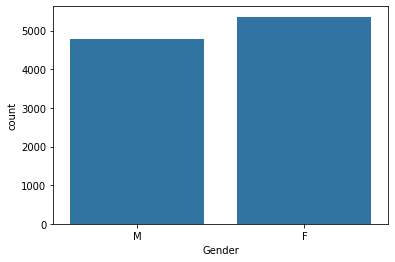

In [34]:
sns.countplot(data = churn_obj, x = 'Gender')
plt.show()

In [35]:
churn_obj['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [36]:
churn_obj['Gender'].unique()

array(['M', 'F'], dtype=object)

In [37]:
unique_count = len(churn_obj['Gender'].unique())
print('Jumlah kategori unik pada fitur Gender adalah {}.'.format(unique_count))

Jumlah kategori unik pada fitur Gender adalah 2.


In [38]:
# Ada value 'abc' pada Income Category
# Gunakan replace untuk diisi nan saja
churn_obj['Income_Category'].replace({'abc':np.nan}, inplace=True)

1
Attrition_Flag


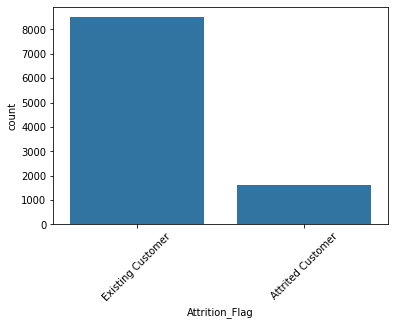

Banyaknya kategori unik pada fitur Attrition_Flag adalah Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64.
Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64
Unique list pada fitur Attrition_Flag adalah ['Existing Customer' 'Attrited Customer'].
Jumlah kategori unik pada fitur Attrition_Flag adalah 2.
**************************************************
2
Gender


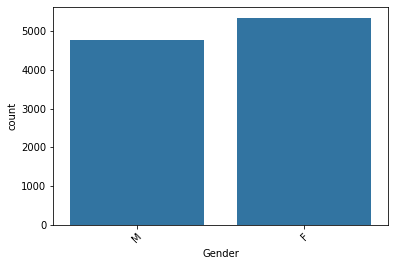

Banyaknya kategori unik pada fitur Gender adalah F    5358
M    4769
Name: Gender, dtype: int64.
F    0.529081
M    0.470919
Name: Gender, dtype: float64
Unique list pada fitur Gender adalah ['M' 'F'].
Jumlah kategori unik pada fitur Gender adalah 2.
**************************************************
3
Education_Level


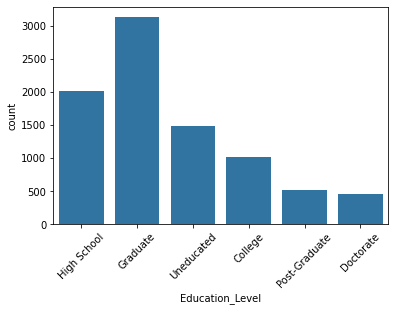

Banyaknya kategori unik pada fitur Education_Level adalah Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64.
Graduate         0.363383
High School      0.233852
Uneducated       0.172746
College          0.117681
Post-Graduate    0.059944
Doctorate        0.052393
Name: Education_Level, dtype: float64
Unique list pada fitur Education_Level adalah ['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate'].
Jumlah kategori unik pada fitur Education_Level adalah 7.
**************************************************
4
Marital_Status


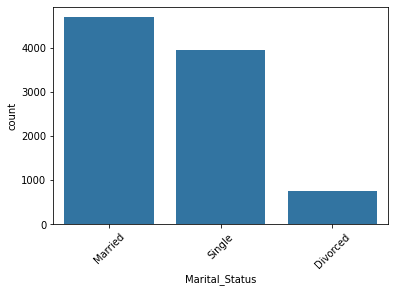

Banyaknya kategori unik pada fitur Marital_Status adalah Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64.
Married     0.499787
Single      0.420452
Divorced    0.079761
Name: Marital_Status, dtype: float64
Unique list pada fitur Marital_Status adalah ['Married' 'Single' nan 'Divorced'].
Jumlah kategori unik pada fitur Marital_Status adalah 4.
**************************************************
5
Income_Category


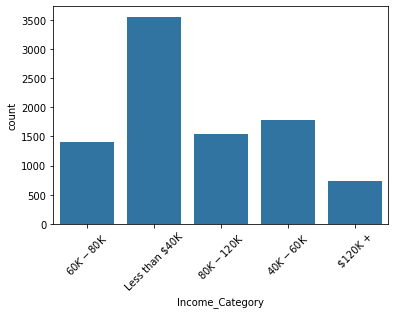

Banyaknya kategori unik pada fitur Income_Category adalah Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64.
Less than $40K    0.395008
$40K - $60K       0.198558
$80K - $120K      0.170272
$60K - $80K       0.155519
$120K +           0.080643
Name: Income_Category, dtype: float64
Unique list pada fitur Income_Category adalah ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +' nan].
Jumlah kategori unik pada fitur Income_Category adalah 6.
**************************************************
6
Card_Category


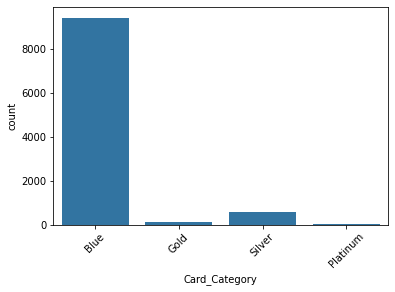

Banyaknya kategori unik pada fitur Card_Category adalah Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64.
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64
Unique list pada fitur Card_Category adalah ['Blue' 'Gold' 'Silver' 'Platinum'].
Jumlah kategori unik pada fitur Card_Category adalah 4.
**************************************************


In [39]:
a = 1
for col in churn_obj.columns:
    print(a)
    print(col)

    # Countplot
    sns.countplot(data=churn_obj, x=col)
    plt.xticks(rotation=45)
    plt.show()

    # Unique count pada masing-masing data
    unique_value_count = churn_obj[col].value_counts()
    print('Banyaknya kategori unik pada fitur {} adalah {}.'.format(col, unique_value_count))

    # Proporsi value count pada masing-masing data
    print(churn_obj[col].value_counts(normalize=True))
    
    # Unique data list
    unique_list = churn_obj[col].unique()
    print('Unique list pada fitur {} adalah {}.'.format(col, unique_list))

    # Banyaknya unique category
    unique_count = len(churn_obj[col].unique())
    print('Jumlah kategori unik pada fitur {} adalah {}.'.format(col, unique_count))


    print('*'*50)
    a += 1

## EDA Multivariate Numerical-Numerical

In [40]:
churn_num.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


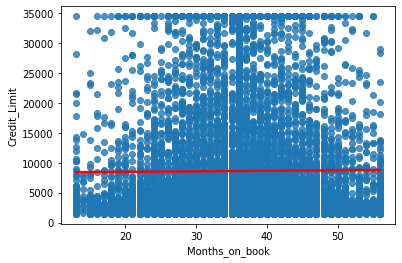

In [41]:
sns.regplot(data = churn_num, x = 'Months_on_book', y = 'Credit_Limit', line_kws = {'color':'red'})
plt.show()

In [42]:
pearsonr(churn_num['Months_on_book'], churn_num['Credit_Limit'])

(0.007507009229698524, 0.4500268740378462)

In [43]:
spearmanr(churn_num['Months_on_book'], churn_num['Credit_Limit'])

SpearmanrResult(correlation=0.006869864700568135, pvalue=0.48940349046296727)

In [44]:
normaltest(churn_num['Months_on_book'])

NormaltestResult(statistic=66.92467470093706, pvalue=2.9342123257748353e-15)

In [45]:
normaltest(churn_num['Credit_Limit'])

NormaltestResult(statistic=2830.070742107507, pvalue=0.0)

In [46]:
# Kalo kedua data tidak normal maka pakai spearman
stats, pvalue = normaltest(churn_num['Months_on_book'])
stats2, pvalue2 = normaltest(churn_num['Credit_Limit'])

if pvalue > 0.05:
    if pvalue2 > 0.05:
        print(pearsonr(churn_num['Months_on_book'], churn_num['Credit_Limit']))
else:
    print(spearmanr(churn_num['Months_on_book'], churn_num['Credit_Limit']))

SpearmanrResult(correlation=0.006869864700568135, pvalue=0.48940349046296727)


Normaltest : 
</br>
p-value < alpha : H0 ditolak, distribusi tidak normal </br>
p-value > alpha : H0 gagal ditolak, distribusi normal
<br>
levene :
<br>
p-value < alpha : H0 ditolak, variansi dua fitur tidak sama </br>
p-value > alpha : H0 gagal ditolak, variansi dua fitur sama

In [47]:
levene(churn_num['Months_on_book'], churn_num['Credit_Limit'])

LeveneResult(statistic=5779.321181139116, pvalue=0.0)

Untuk tiap pasangan fitur numerik-numerik : <br>
1. Buat regplot (garis regresi, bedakan warnanya agar terlihat) <br>
2. Apabila syarat pearson dipenuhi, print korelasi pearson 2 fitur <br>
3. Apabila tidak, print korelasi spearman 2 fitur. <br> 

(optional) <br> 
1. Upayakan agar tidak ada scatterplot duplikat <br> 
2. Upayakan agar fitur sama tidak dibuat scatterplotnya

In [ ]:
start = time.time()

done = []
a = 1

for x in churn_num.columns:
    for y in churn_num.columns:
        if x != y:
            if [y,x] not in done:
                print(a)
                print('{} - {}'.format(x,y))

                # Buat Regplot
                sns.regplot(data=churn_num, x=x, y=y, line_kws={'color':'red'})
                plt.show()

                # Apabila kedua fitur normal gunakan pearson, apabila tidak gunakan spearman
                stats, pvalue = normaltest(churn_num[x])
                stats2, pvalue2 = normaltest(churn_num[y])
                if pvalue > 0.05:
                    if pvalue2 > 0.05:
                        print(pearsonr(churn_num[x], churn_num[y]))
                    else:
                        print(spearmanr(churn_num[x], churn_num[y]))

                    print('*' * 50)
                    a += 1

end = time.time()